In [4]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [14]:
import zipfile
import pandas as pd
import io

# Assuming the Excel file inside the zip is named 'your_excel_file.xlsx'
# You might need to change 'your_excel_file.xlsx' to the actual name of the Excel file
excel_file_name = 'mental_health_diagnosis_treatment_.csv'

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    # Get the list of files in the zip archive to help identify the correct Excel file name
    print("Files in the zip archive:", zip_ref.namelist())
    # Extract the specific Excel file
    zip_ref.extract(excel_file_name)

# Read the extracted Excel file into a pandas DataFrame
df = pd.read_csv(excel_file_name)

display(df.head())

Files in the zip archive: ['mental_health_diagnosis_treatment_.csv']


,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

In [16]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

**Solve Text Standardization Problem**

In [17]:
# df['Patient ID'] = df['Patient ID'].str.replace(r'[^a-zA-Z\s]','',regex=True).str.strip().str.title()
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73


**Missing Values in Age Column**

In [18]:
df ['Age'] = df['Age'].fillna(df['Age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

**Replace and Encode of Male and Female Column**

In [23]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,1,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,1,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,1,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,1,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,0,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


# Clean and Prepare the data

In [24]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64


In [26]:
df = df.dropna(subset=['Diagnosis'])  # Assume these are essential
df['Age'] = df['Age'].fillna(df['Age'].median())   # Example for numerical column
df.fillna("Unknown", inplace=True)

In [27]:
df = df.drop_duplicates()

In [28]:
df.rename(columns={
    'Pt_ID': 'Patient_ID',
    'Diag': 'Diagnosis',
    'Trt': 'Treatment',
    'Mon': 'Monitoring_Score',
    'Dur': 'Treatment_Duration_Weeks',
    'Gen': 'Gender',
    'AgeYrs': 'Age',
    'Loc': 'Location'
}, inplace=True)

In [30]:
df['Patient ID'] = df['Patient ID'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Treatment Duration (weeks)'] = pd.to_numeric(df['Treatment Duration (weeks)'], errors='coerce')

In [31]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2, 'Unknown': -1})

In [33]:
df = pd.get_dummies(df, columns=['Diagnosis'], drop_first=True)

In [34]:
print("Cleaned dataset shape:", df.shape)
print(df.head())

Cleaned dataset shape: (500, 19)
  Patient ID  Age  Gender  Symptom Severity (1-10)  Mood Score (1-10)  \
0          1   43     NaN                       10                  5   
1          2   40     NaN                        9                  5   
2          3   55     NaN                        6                  3   
3          4   34     NaN                        6                  3   
4          5   52     NaN                        7                  6   

   Sleep Quality (1-10)  Physical Activity (hrs/week)        Medication  \
0                     8                             5  Mood Stabilizers   
1                     4                             7    Antipsychotics   
2                     4                             3             SSRIs   
3                     6                             5             SSRIs   
4                     6                             8       Anxiolytics   

                Therapy Type Treatment Start Date  Treatment Duration (weeks)

In [ ]:
# Perform EDA

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("mental_health_diagnosis_treatment_.csv")

In [38]:
print(df.info())
print(df.describe(include='all'))
print("Null values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

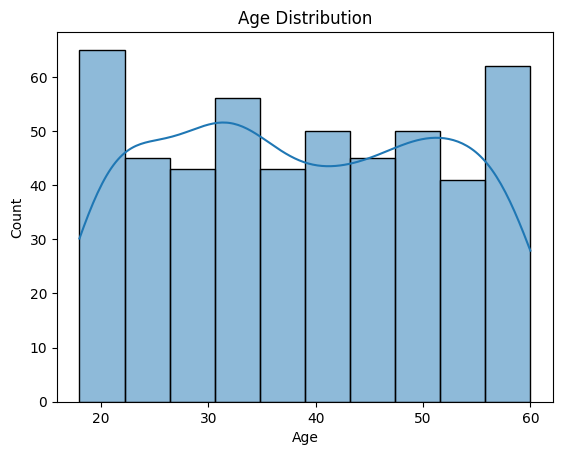

In [39]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution"); plt.show()

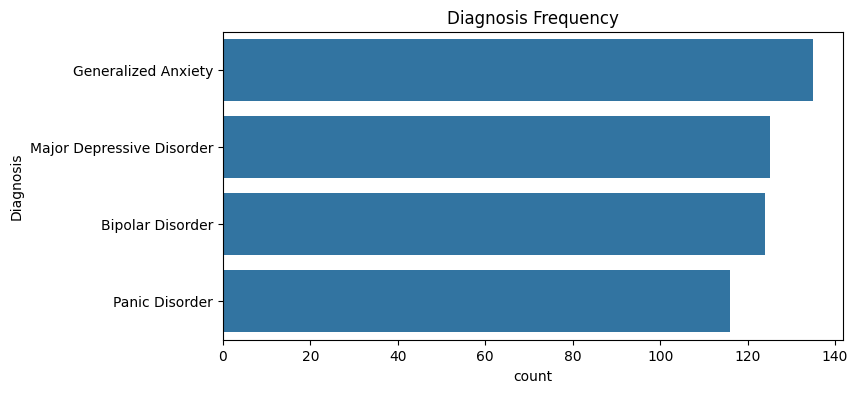

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(y='Diagnosis', data=df, order=df['Diagnosis'].value_counts().index)
plt.title("Diagnosis Frequency"); plt.show()

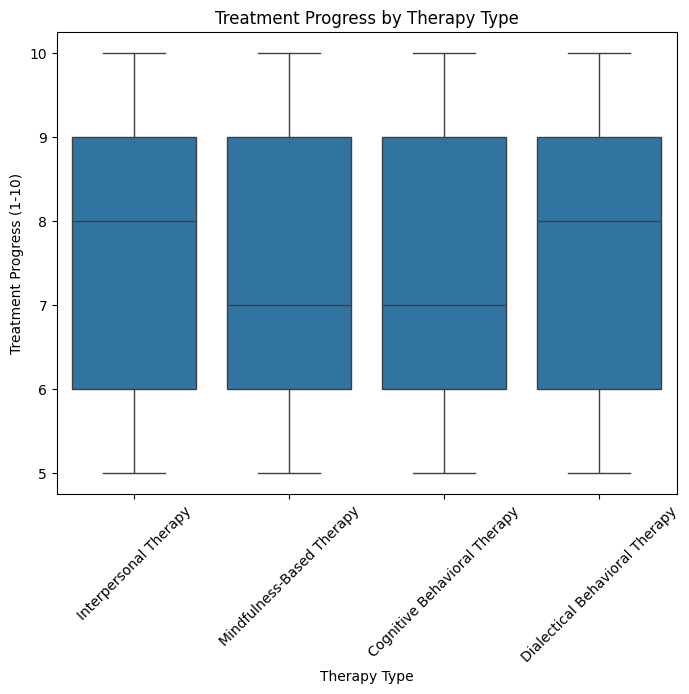

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Therapy Type', y='Treatment Progress (1-10)', data=df)
plt.title("Treatment Progress by Therapy Type"); plt.xticks(rotation=45)
plt.show()

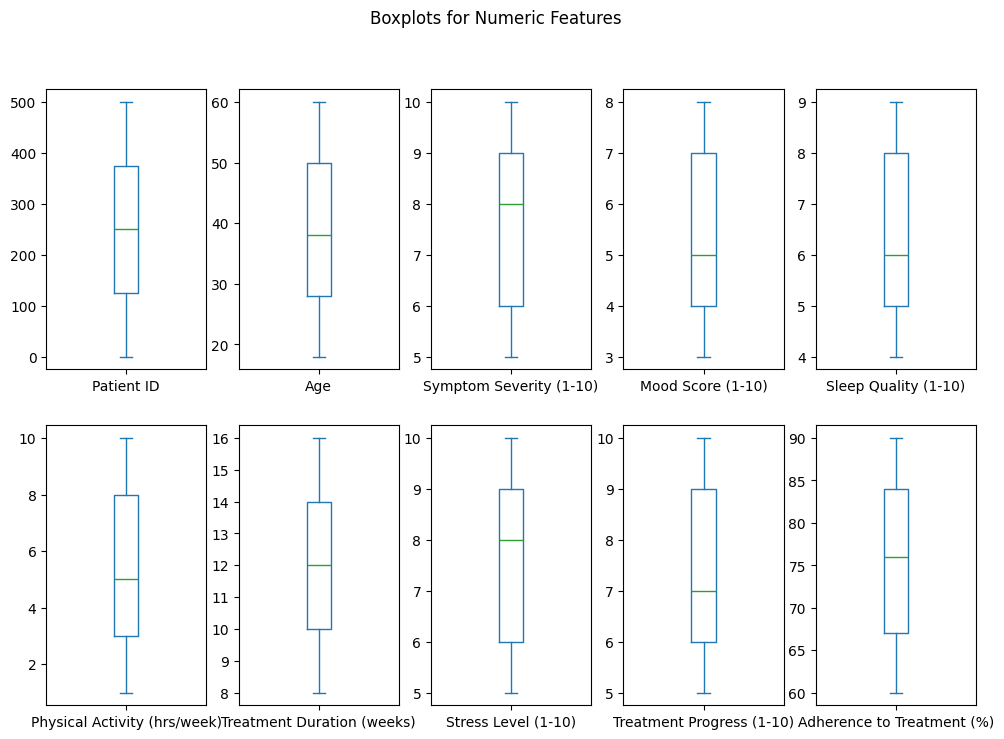

In [44]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].plot(kind='box', subplots=True, layout=(2,5), figsize=(12,8))
plt.suptitle("Boxplots for Numeric Features")
plt.show()

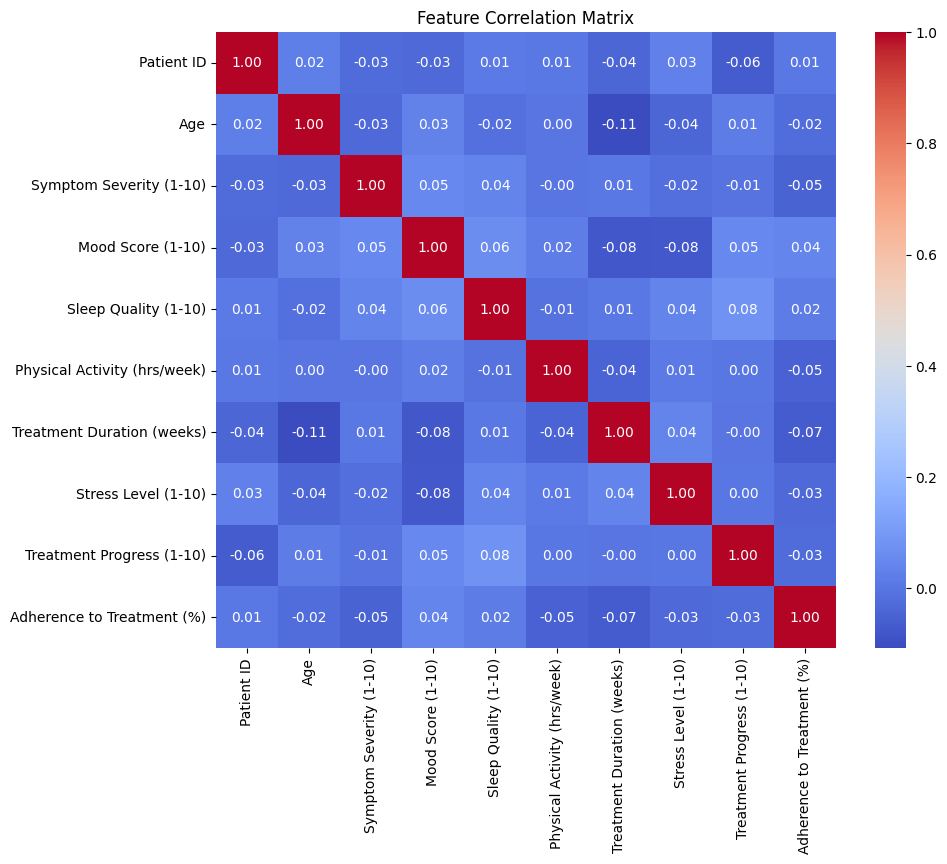

In [45]:
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [46]:
print("Top correlated pairs:")
relation = corr.unstack().sort_values(ascending=False)
print(relation[relation < 1].head(10))

Top correlated pairs:
Sleep Quality (1-10)        Treatment Progress (1-10)     0.082247
Treatment Progress (1-10)   Sleep Quality (1-10)          0.082247
Mood Score (1-10)           Sleep Quality (1-10)          0.064199
Sleep Quality (1-10)        Mood Score (1-10)             0.064199
Mood Score (1-10)           Treatment Progress (1-10)     0.052336
Treatment Progress (1-10)   Mood Score (1-10)             0.052336
Mood Score (1-10)           Symptom Severity (1-10)       0.050077
Symptom Severity (1-10)     Mood Score (1-10)             0.050077
Adherence to Treatment (%)  Mood Score (1-10)             0.041277
Mood Score (1-10)           Adherence to Treatment (%)    0.041277
dtype: float64


# Create Visualizatons

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("mental_health_diagnosis_treatment_.csv")

In [53]:
df['Treatment Duration (weeks)'] = pd.to_numeric(df['Treatment Duration (weeks)'], errors='coerce')

/tmp/ipython-input-54-2146203431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Diagnosis', order=df['Diagnosis'].value_counts().index, palette="viridis")


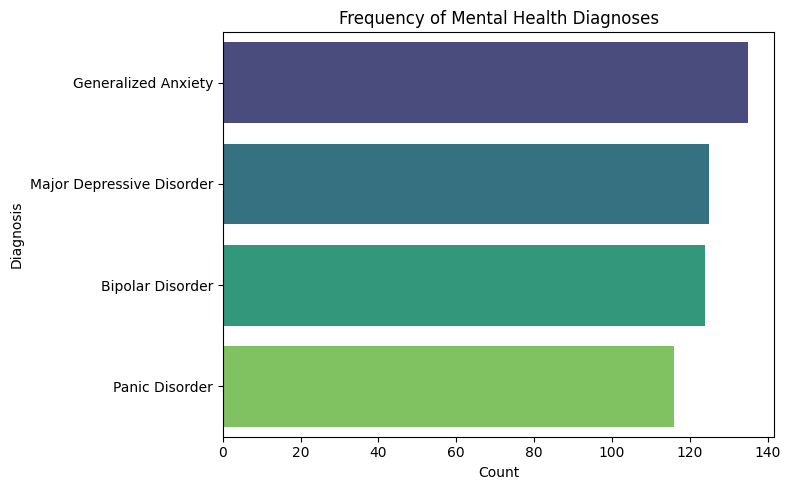

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Diagnosis', order=df['Diagnosis'].value_counts().index, palette="viridis")
plt.title("Frequency of Mental Health Diagnoses")
plt.xlabel("Count")
plt.ylabel("Diagnosis")
plt.tight_layout()
plt.show()

/tmp/ipython-input-56-651726866.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df.groupby('Duration_Bin')['Treatment Progress (1-10)'].mean().reset_index()


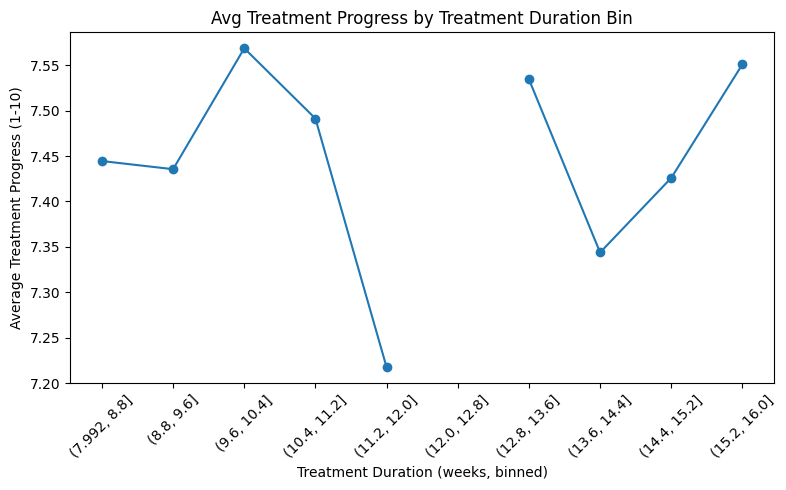

In [56]:
df['Duration_Bin'] = pd.cut(df['Treatment Duration (weeks)'], bins=10)
trend = df.groupby('Duration_Bin')['Treatment Progress (1-10)'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.plot(trend['Duration_Bin'].astype(str), trend['Treatment Progress (1-10)'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Avg Treatment Progress by Treatment Duration Bin")
plt.xlabel("Treatment Duration (weeks, binned)")
plt.ylabel("Average Treatment Progress (1-10)")
plt.tight_layout()
plt.show()

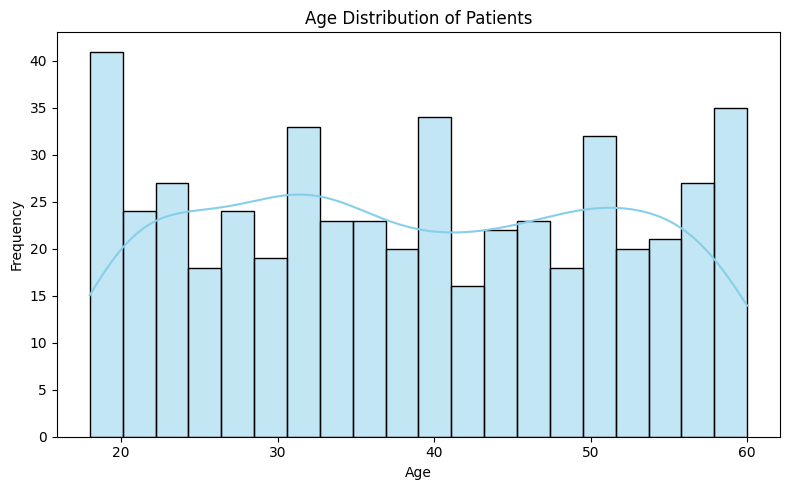

In [57]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=20, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

/tmp/ipython-input-59-651726866.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df.groupby('Duration_Bin')['Treatment Progress (1-10)'].mean().reset_index()


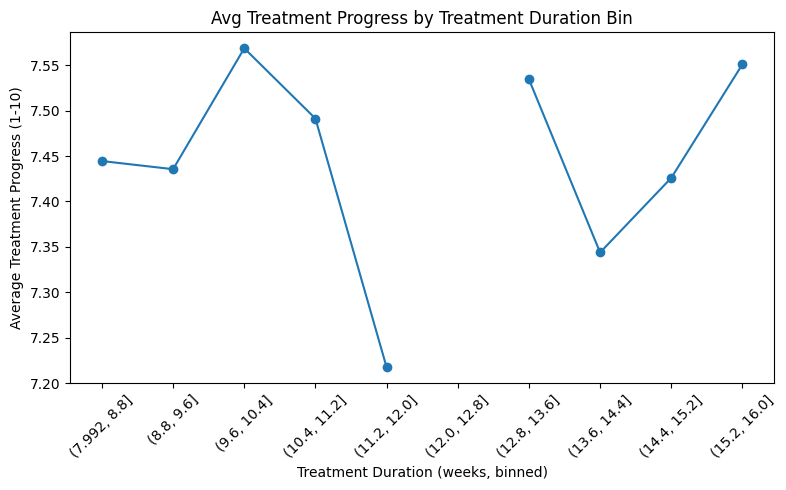

In [59]:
df['Duration_Bin'] = pd.cut(df['Treatment Duration (weeks)'], bins=10)
trend = df.groupby('Duration_Bin')['Treatment Progress (1-10)'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.plot(trend['Duration_Bin'].astype(str), trend['Treatment Progress (1-10)'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Avg Treatment Progress by Treatment Duration Bin")
plt.xlabel("Treatment Duration (weeks, binned)")
plt.ylabel("Average Treatment Progress (1-10)")
plt.tight_layout()
plt.show()

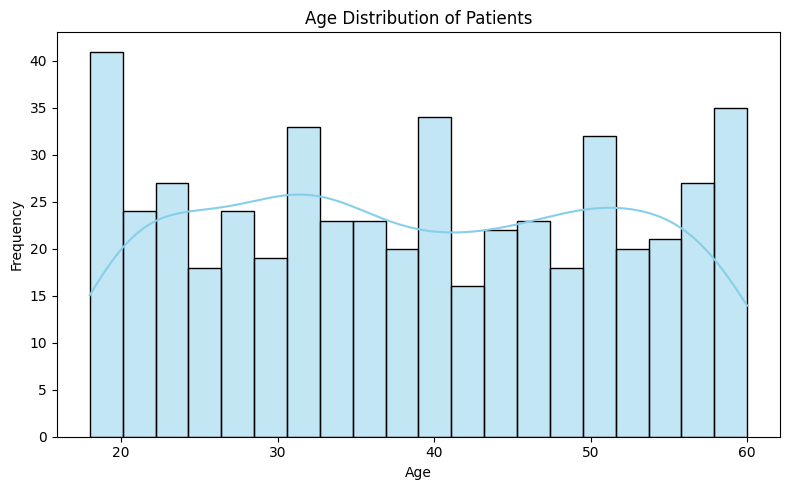

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=20, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

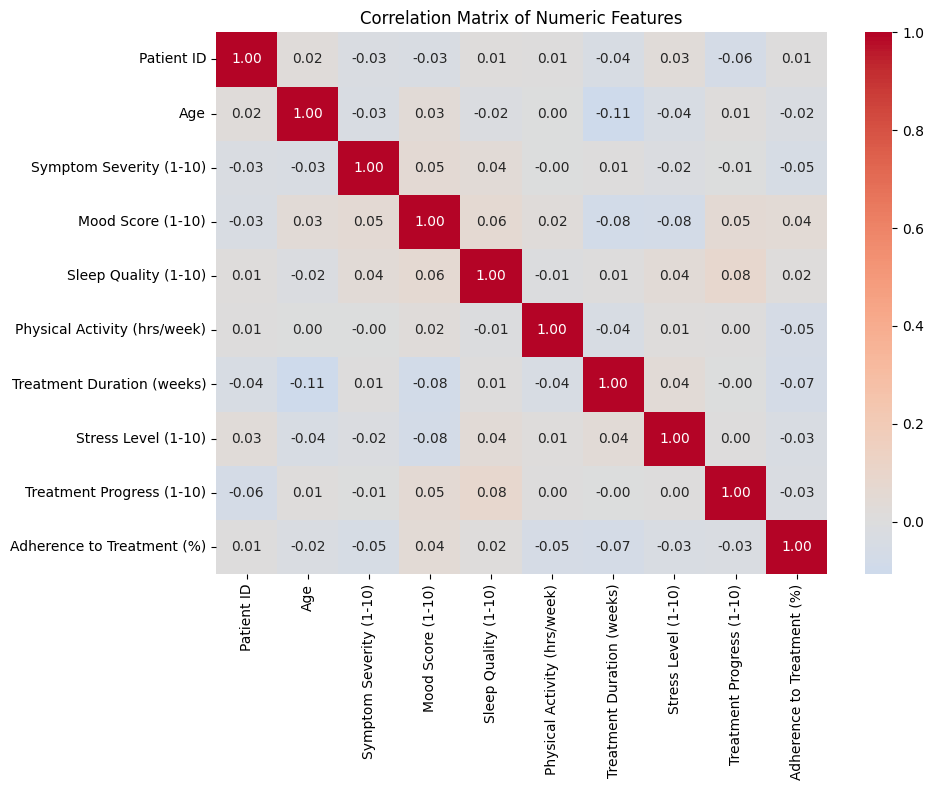

In [61]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

/tmp/ipython-input-63-3852068619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Therapy Type', y='Treatment Progress (1-10)', palette="Set2")


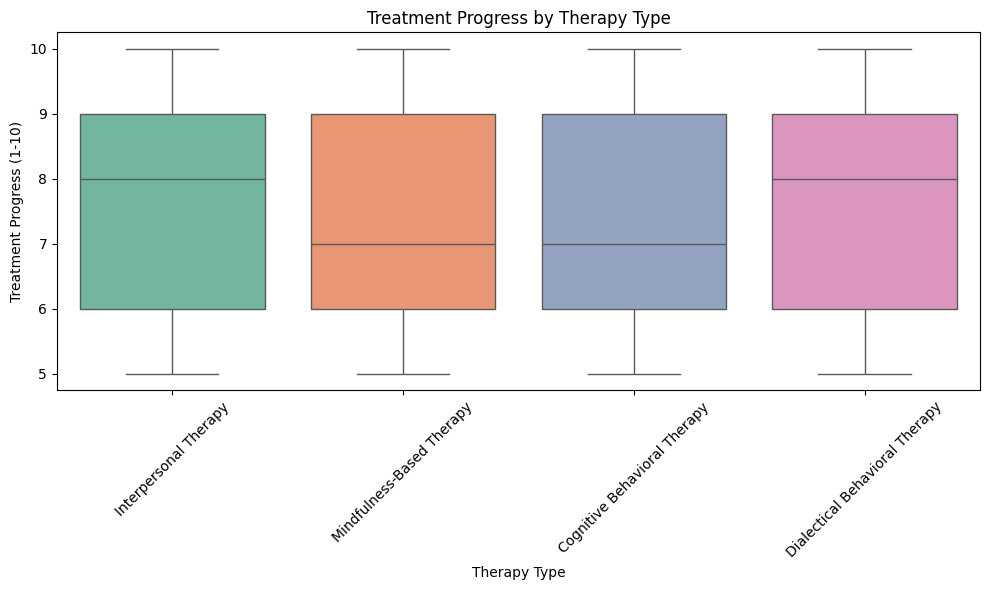

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Therapy Type', y='Treatment Progress (1-10)', palette="Set2")
plt.title("Treatment Progress by Therapy Type")
plt.xlabel("Therapy Type")
plt.ylabel("Treatment Progress (1-10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

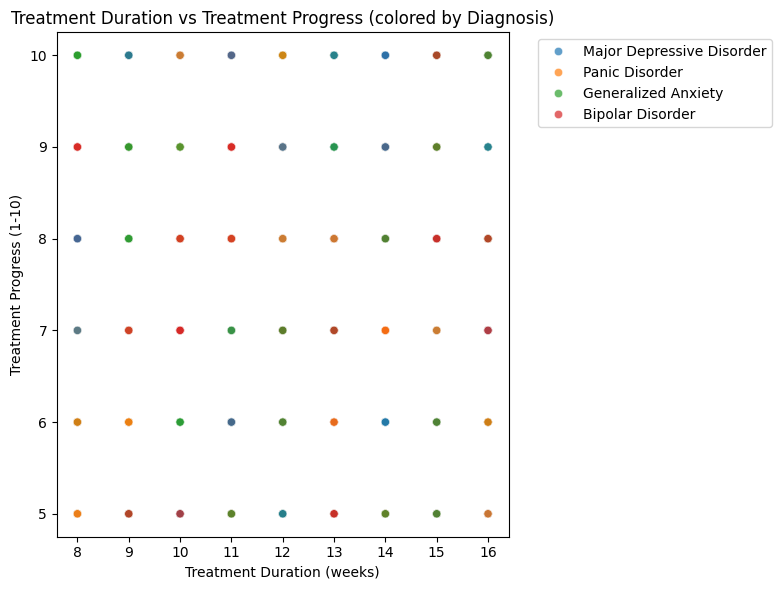

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Treatment Duration (weeks)', y='Treatment Progress (1-10)', hue='Diagnosis', alpha=0.7)
plt.title("Treatment Duration vs Treatment Progress (colored by Diagnosis)")
plt.xlabel("Treatment Duration (weeks)")
plt.ylabel("Treatment Progress (1-10)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()